In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Step 1 : Create the dataset using make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2)

In [4]:
X.shape, y.shape

((1000, 10), (1000,))

## Step 2 : Divide into Training and Testing 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

## Step 3 : Model Training

In [6]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [7]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = logistic.predict(X_test)
print(y_pred)
model_prob = logistic.predict_proba(X_test) ## If you want to see the probabilities.
model_prob = model_prob[:,1]

[0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0]


## Step 4 : Performance Metrics

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(score)
print(cm)
print(classification_report(y_test, y_pred))

0.8933333333333333
[[131  14]
 [ 18 137]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       145
           1       0.91      0.88      0.90       155

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [11]:
model_auc = roc_auc_score(y_test, model_prob)
print(model_auc)

0.9568409343715238


In [12]:
model_fpr, model_tpr, _ = roc_curve(y_test, model_prob)

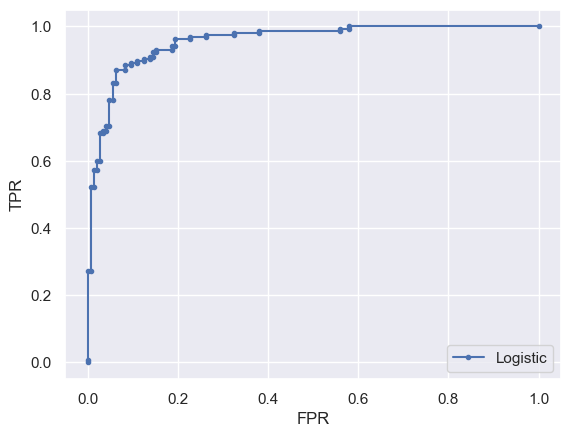

In [13]:
pyplot.plot(model_fpr, model_tpr, marker = '.', label = 'Logistic')
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.legend()
pyplot.show()